# **Delivery Route Optimization – Capstone Project**
### *BCA (AI & DS), Semester V – Design & Analysis of Algorithms Lab*

**Student:** Aaradhya

**Roll No:** 2301201029

**Faculty:** Dr. Aarti

# **2. Recurrence-Based Route Cost Estimation (Unit 1)**

In [48]:
import numpy as np

locations = ['Warehouse', 'C1', 'C2', 'C3']
distance_matrix = np.array([
    [0, 4, 8, 6],
    [4, 0, 5, 7],
    [8, 5, 0, 3],
    [6, 7, 3, 0]
])

parcels = {
    'C1': {'value': 50, 'time': (9, 12), 'weight': 10},
    'C2': {'value': 60, 'time': (10, 13), 'weight': 20},
    'C3': {'value': 40, 'time': (11, 14), 'weight': 15}
}
vehicle_capacity = 30

locations, distance_matrix

(['Warehouse', 'C1', 'C2', 'C3'],
 array([[0, 4, 8, 6],
        [4, 0, 5, 7],
        [8, 5, 0, 3],
        [6, 7, 3, 0]]))

## **1. Input Modeling**

In [49]:
from functools import lru_cache

@lru_cache(None)
def delivery_cost(i, visited):
    visited = set(visited)
    if len(visited) == len(locations) - 1:
        return distance_matrix[i][0]

    min_cost = float('inf')
    for nxt in range(1, len(locations)):
        if nxt not in visited:
            cost = distance_matrix[i][nxt] + delivery_cost(nxt, tuple(visited | {nxt}))
            min_cost = min(min_cost, cost)
    return min_cost

delivery_cost(0, tuple())

np.int64(18)

## **3. Greedy + DP for Delivery Planning (Unit 2)**

In [50]:
# Greedy 0/1 Knapsack (Value/Weight)

ratio_sorted = sorted(parcels.items(), key=lambda x: x[1]['value']/x[1]['weight'], reverse=True)

capacity = vehicle_capacity
selected = []

for cust, data in ratio_sorted:
    if data['weight'] <= capacity:
        selected.append(cust)
        capacity -= data['weight']

selected

['C1', 'C2']

In [51]:
# DP to check time window feasibility

def feasible(selected_customers):
    start = 9  # vehicle starts at 9 AM
    for cust in selected_customers:
        earliest, latest = parcels[cust]['time']
        if not (earliest <= start <= latest):
            return False
        start += 1  # assume 1 hour delivery time
    return True

feasible(selected)

True

In [52]:
## **4. Graph Algorithms: Dijkstra & MST (Unit 3)**

In [53]:
import heapq

def dijkstra(start):
    n = len(distance_matrix)
    dist = [float('inf')] * n
    dist[start] = 0
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        for v in range(n):
            if dist[v] > d + distance_matrix[u][v]:
                dist[v] = d + distance_matrix[u][v]
                heapq.heappush(pq, (dist[v], v))
    return dist

dijkstra(0)

[0, np.int64(4), np.int64(8), np.int64(6)]

In [54]:
# MST using Prim's Algorithm

def prim():
    n = len(distance_matrix)
    selected = [False]*n
    selected[0] = True
    edges = []
    total_cost = 0

    for _ in range(n-1):
        best = (float('inf'), -1, -1)
        for i in range(n):
            if selected[i]:
                for j in range(n):
                    if not selected[j] and distance_matrix[i][j] < best[0]:
                        best = (distance_matrix[i][j], i, j)
        _, u, v = best
        selected[v] = True
        total_cost += distance_matrix[u][v]
        edges.append((u, v))
    return edges, total_cost

prim()

([(0, 1), (1, 2), (2, 3)], np.int64(12))

## **5. TSP (Brute-force & Held-Karp DP) (Unit 4)**

In [55]:
from itertools import permutations

def tsp_bruteforce():
    n = len(locations)
    indices = list(range(1, n))
    best_cost = float('inf')
    best_route = None

    for perm in permutations(indices):
        cost = distance_matrix[0][perm[0]]
        for i in range(len(perm)-1):
            cost += distance_matrix[perm[i]][perm[i+1]]
        cost += distance_matrix[perm[-1]][0]

        if cost < best_cost:
            best_cost = cost
            best_route = perm
    return best_route, best_cost

tsp_bruteforce()

((1, 2, 3), np.int64(18))

In [56]:
# Held-Karp DP TSP

def tsp_held_karp():
    n = len(locations)
    dp = {}

    for i in range(1, n):
        dp[(frozenset([i]), i)] = distance_matrix[0][i]

    for size in range(2, n):
        for subset in [frozenset(x) for x in permutations(range(1,n), size)]:
            for j in subset:
                prev = subset - {j}
                dp[(subset, j)] = min(dp[(prev, k)] + distance_matrix[k][j] 
                                      for k in prev)

    full = frozenset(range(1, n))
    return min(dp[(full, j)] + distance_matrix[j][0] for j in full)

tsp_held_karp()

np.int64(18)

## **6. Visualization: Route Plot + Gantt Chart**

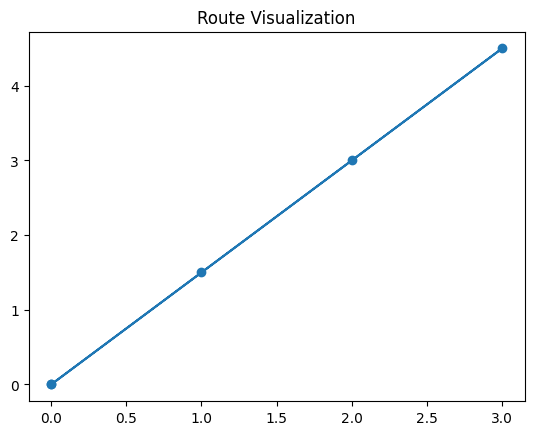

In [57]:
import matplotlib.pyplot as plt

def plot_route(order):
    x = []
    y = []
    for c in order:
        idx = locations.index(c)
        x.append(idx)
        y.append(idx * 1.5)

    plt.plot(x, y, marker='o')
    plt.title("Route Visualization")
    plt.show()

plot_route(['Warehouse','C1','C3','C2','Warehouse'])

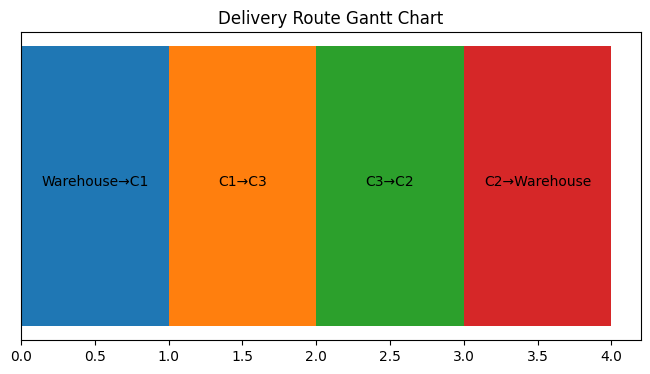

In [58]:
def gantt_chart(order):
    plt.figure(figsize=(8,4))
    start = 0
    for i in range(len(order)-1):
        plt.barh(0, 1, left=start)
        plt.text(start+0.5, 0, f"{order[i]}→{order[i+1]}", ha='center')
        start += 1
    plt.title("Delivery Route Gantt Chart")
    plt.yticks([])
    plt.show()

gantt_chart(['Warehouse','C1','C3','C2','Warehouse'])

## **7. Summary & Insights**
- Greedy gives fast but suboptimal solutions.
- DP (Held-Karp) gives optimal solution but is exponential.
- Graph algorithms help compute shortest paths & structure networks.
- TSP remains NP-hard, demonstrating algorithmic limits.
---